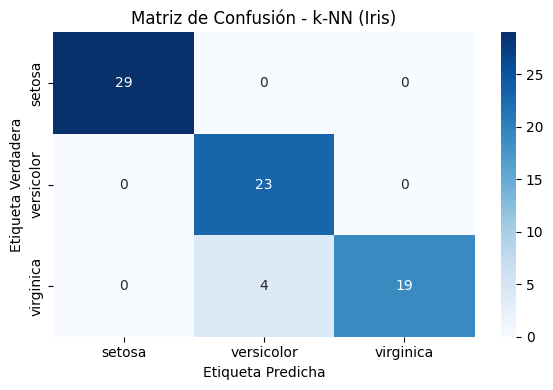


Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        29
  versicolor       0.85      1.00      0.92        23
   virginica       1.00      0.83      0.90        23

    accuracy                           0.95        75
   macro avg       0.95      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75

Precisión total: 0.9466666666666667


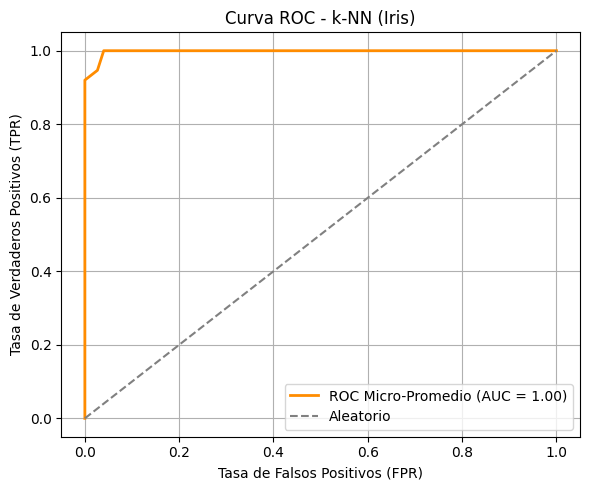

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Cargar datos
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# 2. Binarizar etiquetas para ROC
y_bin = label_binarize(y, classes=[0, 1, 2])
n_classes = y_bin.shape[1]

# 3. Dividir en entrenamiento y prueba
X_train, X_test, y_train_bin, y_test_bin, y_train, y_test = train_test_split(
    X, y_bin, y, test_size=0.5, random_state=42)

# 4. Entrenar modelo k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_bin)

# 5. Predicciones
#y_score = knn.predict_proba(X_test)  # Probabilidades para curva ROC
y_score_list = knn.predict_proba(X_test)
y_score = np.stack([y_score_list[i][:, 1] if y_score_list[i].shape[1] > 1 else y_score_list[i][:, 0]
                    for i in range(len(y_score_list))], axis=1)
y_pred = knn.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_bin, axis=1)

# 6. Matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.title("Matriz de Confusión - k-NN (Iris)")
plt.tight_layout()
plt.show()

# 7. Reporte de clasificación
print("\nReporte de Clasificación:\n", classification_report(y_test_labels, y_pred_labels, target_names=class_names))
print("Precisión total:", accuracy_score(y_test_labels, y_pred_labels))

# 8. Curva ROC micro-promedio
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# 9. Graficar curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr_micro, tpr_micro, color='darkorange',
         lw=2, label=f'ROC Micro-Promedio (AUC = {roc_auc_micro:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - k-NN (Iris)')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


# **Visualización de Resultados**

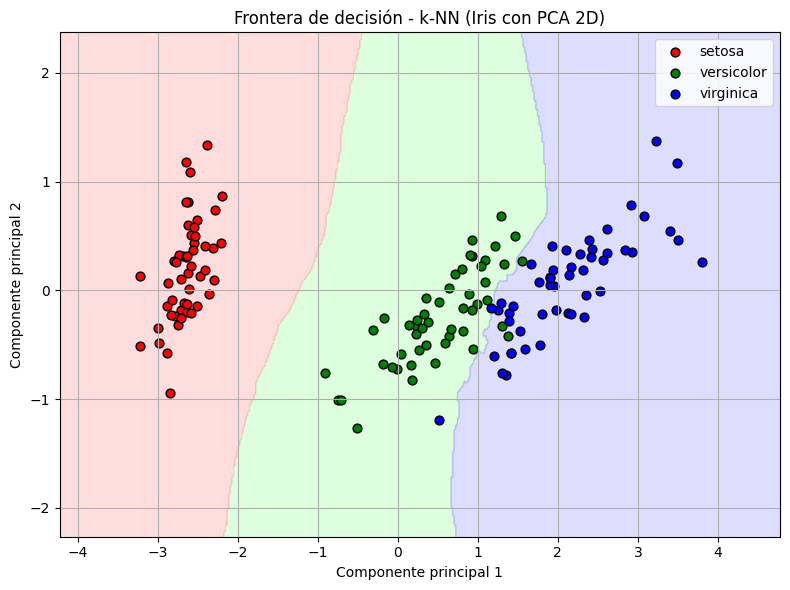

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 1. Cargar datos y reducir a 2D con PCA
iris = load_iris()
X = iris.data
y = iris.target
X_pca = PCA(n_components=2).fit_transform(X)

# 2. Entrenar modelo k-NN en espacio 2D
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 3. Crear malla para graficar frontera
h = 0.02
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Graficar
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
for i, color in zip(range(3), cmap_bold):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                label=iris.target_names[i], edgecolor='k', s=40, color=color)

plt.title("Frontera de decisión - k-NN (Iris con PCA 2D)")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
